# import

In [86]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time, urllib.request
import requests
from PIL import Image
import io
import requests
from PIL import Image
import io
import pandas as pd
import urllib.request
import os
import numpy as np
import json
import os
from tqdm import tqdm
tqdm.pandas()


In [56]:


# Specify the correct path to the ChromeDriver executable
# cService = webdriver.ChromeService(executable_path='C:/Users/21628/Downloads/chromedriver_win32/chromedriver.exe')
driver = webdriver.Chrome()

# Navigate to the Instagram login page
driver.get("https://www.instagram.com")



# login

In [57]:
time.sleep(5)
username=driver.find_element(By.CSS_SELECTOR,"input[name='username']")
password=driver.find_element(By.CSS_SELECTOR,"input[name='password']")
username.clear()
password.clear()
username.send_keys("ownsiw@duck.com")
password.send_keys("o8293ksowk9232")
login = driver.find_element(By.CSS_SELECTOR,"button[type='submit']").click()

counter=1

# proxies

In [38]:

# driver = webdriver.Chrome()
with open('validated_proxies.txt') as f:
    proxies=f.readlines()
try:
    print(f"proxy: {proxies[counter]}")
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--proxy-server=%s' % proxies[counter])
    chrome = webdriver.Chrome(options=chrome_options)
    driver.get("https://www.instagram.com/cristiano/")

except(requests.exceptions.RequestException,requests.exceptions.Timeout) as exc:
    print(exc)
finally:
    counter = counter + 1   
    counter % len(proxies)

proxy: 213.233.177.134:80



# scraping

In [65]:
captions = []
source = []
username=""
followers = driver.find_element(By.CSS_SELECTOR,"#mount_0_0_wr > div > div > div.x9f619.x1n2onr6.x1ja2u2z > div > div > div.x78zum5.xdt5ytf.x1t2pt76.x1n2onr6.x1ja2u2z.x10cihs4 > div.x9f619.xvbhtw8.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.x1q0g3np.xqjyukv.x1qjc9v5.x1oa3qoh.x1qughib > div.x1gryazu.xh8yej3.x10o80wk.x14k21rp.x17snn68.x6osk4m.x1porb0y > div:nth-child(2) > section > main > div > header > section > ul > li:nth-child(2) > a > span > span").text
followees=driver.find_element(By.CSS_SELECTOR,"#mount_0_0_wr > div > div > div.x9f619.x1n2onr6.x1ja2u2z > div > div > div.x78zum5.xdt5ytf.x1t2pt76.x1n2onr6.x1ja2u2z.x10cihs4 > div.x9f619.xvbhtw8.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.x1q0g3np.xqjyukv.x1qjc9v5.x1oa3qoh.x1qughib > div.x1gryazu.xh8yej3.x10o80wk.x14k21rp.x17snn68.x6osk4m.x1porb0y > div:nth-child(2) > section > main > div > header > section > ul > li:nth-child(3) > a > span > span").text
bio=driver.find_element(By.CSS_SELECTOR,"#mount_0_0_wr > div > div > div.x9f619.x1n2onr6.x1ja2u2z > div > div > div.x78zum5.xdt5ytf.x1t2pt76.x1n2onr6.x1ja2u2z.x10cihs4 > div.x9f619.xvbhtw8.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.x1q0g3np.xqjyukv.x1qjc9v5.x1oa3qoh.x1qughib > div.x1gryazu.xh8yej3.x10o80wk.x14k21rp.x17snn68.x6osk4m.x1porb0y > div:nth-child(2) > section > main > div > header > section > div.x7a106z.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x78zum5.xdt5ytf.x2lah0s.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x1n2onr6.x11njtxf.xwonja6.x1dyjupv.x1onnzdu.xwrz0qm.xgmu61r.x1nbz2ho.xbjc6do > h1").text
while len(captions) < 80:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for the page to load
    images = driver.find_elements(By.TAG_NAME, "img")
    new_captions = [image.get_attribute("alt") for image in images if image.get_attribute("alt") not in captions]
    new_sources = [image.get_attribute("src") for image in images if image.get_attribute("src") not in source]
    
    captions.extend(new_captions)
    source.extend(new_sources)
    
    if len(new_captions) == 0:
        break

print(captions)
print(followers)
print(followees)
print(bio)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#mount_0_0_wr > div > div > div.x9f619.x1n2onr6.x1ja2u2z > div > div > div.x78zum5.xdt5ytf.x1t2pt76.x1n2onr6.x1ja2u2z.x10cihs4 > div.x9f619.xvbhtw8.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.x1q0g3np.xqjyukv.x1qjc9v5.x1oa3qoh.x1qughib > div.x1gryazu.xh8yej3.x10o80wk.x14k21rp.x17snn68.x6osk4m.x1porb0y > div:nth-child(2) > section > main > div > header > section > ul > li:nth-child(2) > a > span > span"}
  (Session info: chrome=123.0.6312.106); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6EE887072+63090]
	(No symbol) [0x00007FF6EE7F2CC2]
	(No symbol) [0x00007FF6EE68EC65]
	(No symbol) [0x00007FF6EE6D499D]
	(No symbol) [0x00007FF6EE6D4ADC]
	(No symbol) [0x00007FF6EE715B37]
	(No symbol) [0x00007FF6EE6F701F]
	(No symbol) [0x00007FF6EE713412]
	(No symbol) [0x00007FF6EE6F6D83]
	(No symbol) [0x00007FF6EE6C83A8]
	(No symbol) [0x00007FF6EE6C9441]
	GetHandleVerifier [0x00007FF6EEC825CD+4238285]
	GetHandleVerifier [0x00007FF6EECBF72D+4488493]
	GetHandleVerifier [0x00007FF6EECB7A0F+4456463]
	GetHandleVerifier [0x00007FF6EE9605B6+953270]
	(No symbol) [0x00007FF6EE7FE58F]
	(No symbol) [0x00007FF6EE7F9264]
	(No symbol) [0x00007FF6EE7F939B]
	(No symbol) [0x00007FF6EE7E9BD4]
	BaseThreadInitThunk [0x00007FF949AA7344+20]
	RtlUserThreadStart [0x00007FF94A2226B1+33]


['', '', 'https://instagram.fjai1-1.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?_nc_ht=instagram.fjai1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=DU6E6mKi0EgAb4bLhXQ&edm=AI8ESKwBAAAA&ccb=7-5&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-5&oh=00_AfCSdNsia0Uixp0DvbDKIL46ZxHFKa0W_B5qvi5UuNoEfw&oe=6619EA8F&_nc_sid=b1bb43', 'https://scontent.cdninstagram.com/v/t51.2885-19/278931269_360124899498969_9006978846103417088_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent.cdninstagram.com&_nc_cat=1&_nc_ohc=iQeVo_Li-5oAb4JqHGa&edm=APs17CUBAAAA&ccb=7-5&oh=00_AfDVWcfq3phTaPnWDsACWzicvb6MrQSK6pLPptJBr-Hr8g&oe=661A0E4E&_nc_sid=10d13b', 'https://scontent.cdninstagram.com/v/t51.29350-15/435538510_1848872568871075_5330961097333253269_n.jpg?stp=dst-jpg_e15&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi43MjB4OTAwLnNkciJ9&_nc_ht=scontent.cdninstagram.com&_nc_cat=1&_nc_ohc=YVH1uusVo64Ab6t0U-n&edm=APs17CUBAAAA&ccb=7-5&ig_cache_key=MzM0MDMzMjI4OTczMTA0MzgxOQ%3D%3D.2-ccb7-5&oh=00_AfBUhePT1rxGI
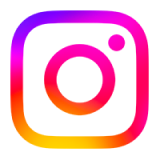
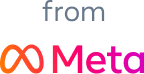

In [40]:
print(source)

 

 

https://instagram.fjai1-1.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?_nc_ht=instagram.fjai1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=DU6E6mKi0EgAb4bLhXQ&edm=AI8ESKwBAAAA&ccb=7-5&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-5&oh=00_AfCSdNsia0Uixp0DvbDKIL46ZxHFKa0W_B5qvi5UuNoEfw&oe=6619EA8F&_nc_sid=b1bb43 

https://scontent.cdninstagram.com/v/t51.2885-19/278931269_360124899498969_9006978846103417088_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent.cdninstagram.com&_nc_cat=1&_nc_ohc=iQeVo_Li-5oAb4JqHGa&edm=APs17CUBAAAA&ccb=7-5&oh=00_AfDVWcfq3phTaPnWDsACWzicvb6MrQSK6pLPptJBr-Hr8g&oe=661A0E4E&_nc_sid=10d13b 

https://scontent.cdninstagram.com/v/t51.29350-15/435538510_1848872568871075_5330961097333253269_n.jpg?stp=dst-jpg_e15&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi43MjB4OTAwLnNkciJ9&_nc_ht=scontent.cdninstagram.com&_nc_cat=1&_nc_ohc=YVH1uusVo64Ab6t0U-n&edm=APs17CUBAAAA&ccb=7-5&ig_cache_key=MzM0MDMzMjI4OTczMTA0MzgxOQ%3D%3D.2-ccb7-5&oh=00_AfBUhePT1rxGI4DrNtG
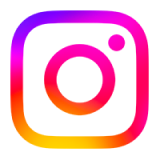
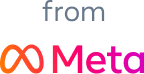

In [41]:
for path in source :
    print(path,'\n')

# URL to image

In [42]:
def url_image(url):
    # Send a GET request to the image URL
    response = requests.get(url)
    # Check for successful response (status code 200)
    if response.status_code == 200:
      try:
          # Open the image data as a PIL Image object
          image = Image.open(io.BytesIO(response.content))
          # Convert the image to a 2D NumPy array
          image_array = np.array(image)
          return image_array
      except Exception as e:
          return np.array([])

    else:
      print(f"Failed to download image for this URL {url} with Status code: {response.status_code}")
      return np.array([])

In [45]:
images = []
for pathimage in source[2:]:
    images.append(url_image(pathimage))

In [44]:
url_image('https://instagram.fbsr5-2.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?_nc_ht=instagram.fbsr5-2.fna.fbcdn.net&_nc_cat=1&_nc_ohc=DU6E6mKi0EgAb5cL1ty&edm=AFs-eF8BAAAA&ccb=7-5&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-5&oh=00_AfDk1rRNEXpnyBf36nAejlpeviSIdphWF_FOqTtEEkAumQ&oe=6619B24F&_nc_sid=72eed0 ')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

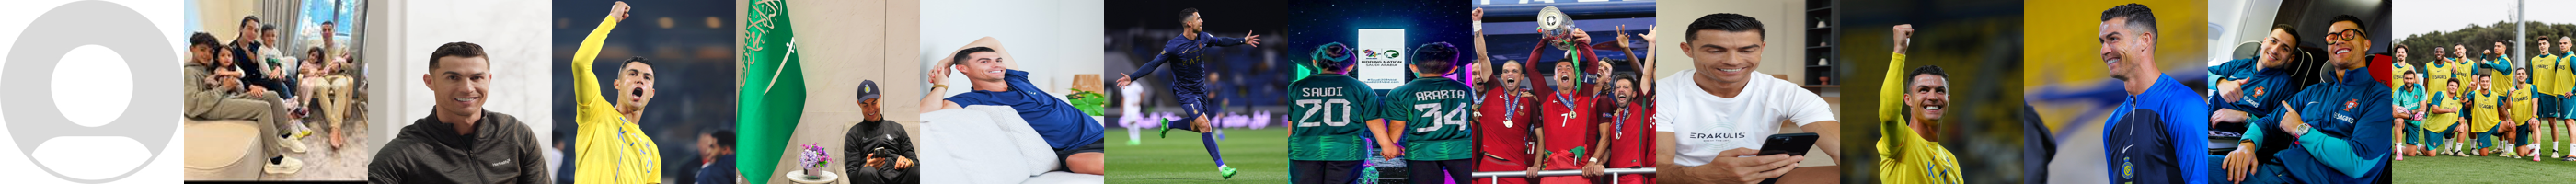

In [109]:
SHOW_image = []
for img in images:
    img = Image.fromarray(img)
    img = img.resize((200,200))
    img = np.array(img)
    SHOW_image.append(img)
Image.fromarray(np.concatenate(SHOW_image,axis=1))

In [83]:
username='ronaldo'
followers='680 m'
followees='586'
bio="bio ronaldo "
caption=['caption 1']
personality='openness'
images[1]

array([[[195, 223, 237],
        [197, 223, 238],
        [199, 225, 238],
        ...,
        [114, 114, 114],
        [ 70,  68,  69],
        [ 78,  74,  75]],

       [[195, 223, 237],
        [197, 223, 236],
        [199, 225, 238],
        ...,
        [111, 111, 111],
        [ 69,  67,  68],
        [ 77,  73,  74]],

       [[195, 223, 235],
        [197, 223, 236],
        [199, 225, 238],
        ...,
        [104, 104, 104],
        [ 67,  65,  66],
        [ 76,  74,  75]],

       ...,

       [[105,  92,  76],
        [105,  92,  76],
        [105,  92,  76],
        ...,
        [ 90,  80,  71],
        [103,  93,  84],
        [111, 101,  92]],

       [[  5,   1,   0],
        [  5,   1,   0],
        [  5,   1,   0],
        ...,
        [  6,   0,   0],
        [  8,   1,   0],
        [ 10,   3,   0]],

       [[  1,   2,   0],
        [  1,   2,   0],
        [  1,   2,   0],
        ...,
        [  4,   0,   0],
        [  3,   0,   0],
        [  4,   0,   0]]

# create JSON file

In [110]:
 filename = f"cristiano.json"


# add data to json 

In [115]:


    user_dict = {
        "username": username,
        "num_followers": followers,
        "num_followees": followees,
        "bio": bio,
        "caption": caption[0],
        "image": images[2].tolist(),
        "personality": personality
    }
    with open(filename, "w") as json_file:
        json.dump(user_dict, json_file, indent=4)
    print(f"User profile for {username} saved to {filename}")
    

User profile for ronaldo saved to cristiano.json


# READ FROM JSON FILE

In [117]:
with open(filename, "r") as json_file:
   
    data = json.load(json_file)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



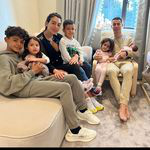

In [114]:
image_array = np.array(data['image'])
image_array = image_array.astype(np.uint8)
Image.fromarray(image_array, mode='RGB')